<a href="https://colab.research.google.com/github/ulya1202/Audio/blob/main/VADandSER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VAD and SER

##Import

### kitabxanalar

In [18]:
from torchaudio.functional import resample

In [1]:
!apt-get update -qq && apt-get install -qq -y ffmpeg
!pip install -q torchcodec
!pip install -q demucs
!pip install -q datasets huggingface_hub
!pip install -q transformers torch torchaudio librosa matplotlib
!pip install datasets --upgrade
!pip install -q -U silero
!pip install -q pyannote.audio

⏳ Addım 1/3: FFmpeg quraşdırılır...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ FFmpeg uğurla quraşdırıldı.

⏳ Addım 2/3: torchcodec quraşdırılır...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.9 MB/s eta 0:00:00
✅ torchcodec uğurla quraşdırıldı.

⏳ Addım 3/3: Digər Python kitabxanaları quraşdırılır...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.1/87.1 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# !pip install -q torch soundfile


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 26.6 MB/s eta 0:00:00
   

In [4]:
from demucs.apply import apply_model
from demucs.pretrained import get_model as get_demucs_model
import torchaudio

In [5]:
#Kitabxanaların import edilməsi
import torch
from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2FeatureExtractor
import librosa
import numpy as np
import pandas as pd
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import os
import soundfile as sf
print("✅ Modullar import edildi.")

✅ Modullar import edildi.


In [ ]:
# !apt-get install -y libsox-dev

In [6]:
from scipy.fft import fft, fftfreq

In [7]:
from google.colab import files
from pprint import pprint

In [8]:
from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2FeatureExtractor
 # Colab-a fayl yükləmək üçün

print("✅ Modullar import edildi.")

✅ Modullar import edildi.


In [9]:
from google.colab import userdata
HF_TOKEN=userdata.get('HF_TOKEN')

In [10]:
from huggingface_hub import login
login(token=HF_TOKEN)

In [11]:
from pyannote.audio import Pipeline

### data

##### simple speeche

In [12]:
wp_audio='/content/drive/MyDrive/WhatsApp Ptt 2025-07-29 at 14.48.49.ogg'

#####Complex task (such as songs)

In [13]:
audio_url = "https://upload.wikimedia.org/wikipedia/commons/a/a7/Ke%C3%A7%C9%99%C3%A7io%C4%9Flu_M%C9%99h%C9%99mm%C9%99d-Yetim_Segah_%281909%29.ogg"
downloaded_audio_filename = "online_audio.ogg"
print(f"'{audio_url}' linkindən audio fayl endirilir...")

!wget -q -O {downloaded_audio_filename} "{audio_url}"

'https://upload.wikimedia.org/wikipedia/commons/a/a7/Ke%C3%A7%C9%99%C3%A7io%C4%9Flu_M%C9%99h%C9%99mm%C9%99d-Yetim_Segah_%281909%29.ogg' linkindən audio fayl endirilir...


#####Dataset

###### emotion

In [14]:
# from datasets import load_dataset #########ERROR
# dataset = load_dataset("sananmammadov/azerbaijan-sound-dataset")
# dataset

README.md:   0%|          | 0.00/534 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/211M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/528 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'video_id', 'start_ms', 'end_ms', 'start_time', 'end_time'],
        num_rows: 528
    })
})

In [65]:
# from datasets import load_dataset

# # Köhnə kod:
# # dataset = load_dataset('Thanushs25/tamil-audio-emotion-classification', force_download=True)

# # YENİ VƏ DÜZGÜN KOD:
# # Niyə? -> Biz burada kitabxanaya açıq şəkildə deyirik:
# # 1. Bu bir "audiofolder" tipli datasetdir.
# # 2. Bu datasetin içindəki audio faylları "final_data" adlı qovluqdadır.
# dataset = load_dataset(
#     "Thanushs25/tamil-audio-emotion-classification",
#     data_dir="final_data",  # Datanın olduğu qovluğu dəqiq göstəririk
#     split="train"           # Yalnız təlim hissəsini yükləyirik
# )



Resolving data files:   0%|          | 0/196 [00:00<?, ?it/s]

audio_39.wav:   0%|          | 0.00/2.98M [00:00<?, ?B/s]

audio_43.wav:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

audio_38.wav:   0%|          | 0.00/3.32M [00:00<?, ?B/s]

audio_37.wav:   0%|          | 0.00/2.84M [00:00<?, ?B/s]

audio_46.wav:   0%|          | 0.00/3.49M [00:00<?, ?B/s]

audio_42.wav:   0%|          | 0.00/3.19M [00:00<?, ?B/s]

audio_45.wav:   0%|          | 0.00/2.87M [00:00<?, ?B/s]

audio_41.wav:   0%|          | 0.00/3.66M [00:00<?, ?B/s]

audio_44.wav:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

audio_34.wav:   0%|          | 0.00/3.33M [00:00<?, ?B/s]

audio_40.wav:   0%|          | 0.00/3.26M [00:00<?, ?B/s]

audio_35.wav:   0%|          | 0.00/3.00M [00:00<?, ?B/s]

audio_4.wav:   0%|          | 0.00/2.63M [00:00<?, ?B/s]

audio_33.wav:   0%|          | 0.00/1.77M [00:00<?, ?B/s]

audio_47.wav:   0%|          | 0.00/5.21M [00:00<?, ?B/s]

audio_36.wav:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

audio_48.wav:   0%|          | 0.00/3.25M [00:00<?, ?B/s]

audio_8.wav:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

audio_6.wav:   0%|          | 0.00/3.25M [00:00<?, ?B/s]

audio_9.wav:   0%|          | 0.00/3.39M [00:00<?, ?B/s]

audio_7.wav:   0%|          | 0.00/3.06M [00:00<?, ?B/s]

audio_5.wav:   0%|          | 0.00/3.20M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

## Main Variables

In [31]:
SAMPLING_RATE=16000

## Functions

### for plots

In [34]:
def plot_speech_spectr(speech_timestamps,wav_tensor,SAMPLING_RATE):
  plt.plot(wav_tensor.numpy(), label='Səs dalğası')

  if speech_timestamps: # Check if the list is not empty
    for i,seg in enumerate(speech_timestamps):
        start = seg['start']
        end = seg['end']
        print(f"Danışıq {i+1}: Başlangıc: {round(start/SAMPLING_RATE)} san,  Son: {round(end/SAMPLING_RATE)} san")
        plt.axvspan(start, end, color='red', alpha=0.3)

  plt.title("Danışıq hisseleri qırmızı ilə")
  # Only add the legend entry if there are timestamps to display

  plt.xlabel("Sample")
  plt.ylabel("Amplituda")
  if speech_timestamps:
        plt.plot([], [], color='red', alpha=0.3, linewidth=10, label='Danışıq')

    # İndi legendanı çağırırıq. O, təkrarlanma olmadan hər elementi bir dəfə göstərəcək.
  plt.legend()
  plt.show()

In [35]:
def plot_wave(file):
  y, sr = librosa.load(file, sr=None)

  librosa.display.waveshow(y[:sr*5], sr=sr)  # İlk 5 saniyə
  plt.title("Waveform")

  return y, sr

In [36]:
def audio_show(file,name=None):
  if name:
    print(name)
  display(Audio(file))


In [37]:
def spectogram(y,sr):
  mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
  log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
  librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
  plt.title('Log-Mel Spectrogram')
  plt.colorbar(format='%+2.0f dB')


In [38]:
def forier(wave,SAMPLING_RATE=16000):
  N = len(wave)
  yf = fft(wave)
  xf = fftfreq(N, 1 /SAMPLING_RATE )

  plt.plot(xf[:N//2], np.abs(yf[:N//2]))
  plt.title("Frequency Spectrum")

## EDA

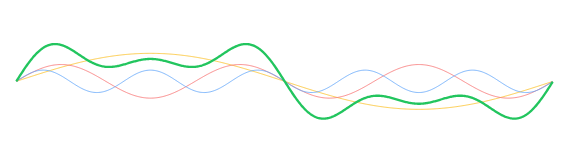

Spektroqram, Furye Çevrilməsi (Fourier Transform) adlı riyazi bir alət vasitəsilə mürəkkəb dalğanı (yaşıl xətti) yenidən öz tərkib hissələrinə – yəni fərqli tezliklərə ayırır və nəticəni bir "istilik xəritəsi" kimi göstərir.

Adi spectrogram tezlikləri xətti (Hz) ölçür. Amma insan qulağı logaritmik eşidir.

Mel-Spectrogram insan qulağının eşitmə qabiliyyətinə daha yaxın şəkildə təhlil aparır.

Bu səbəblə emosional analiz, danışıq tanıma, mahnı janrı təyini, VAD, SER (Speech Emotion Recognition) və digər NLP + Audio layihələrdə istifadə olunur.

### WP audio

whatsapp speech


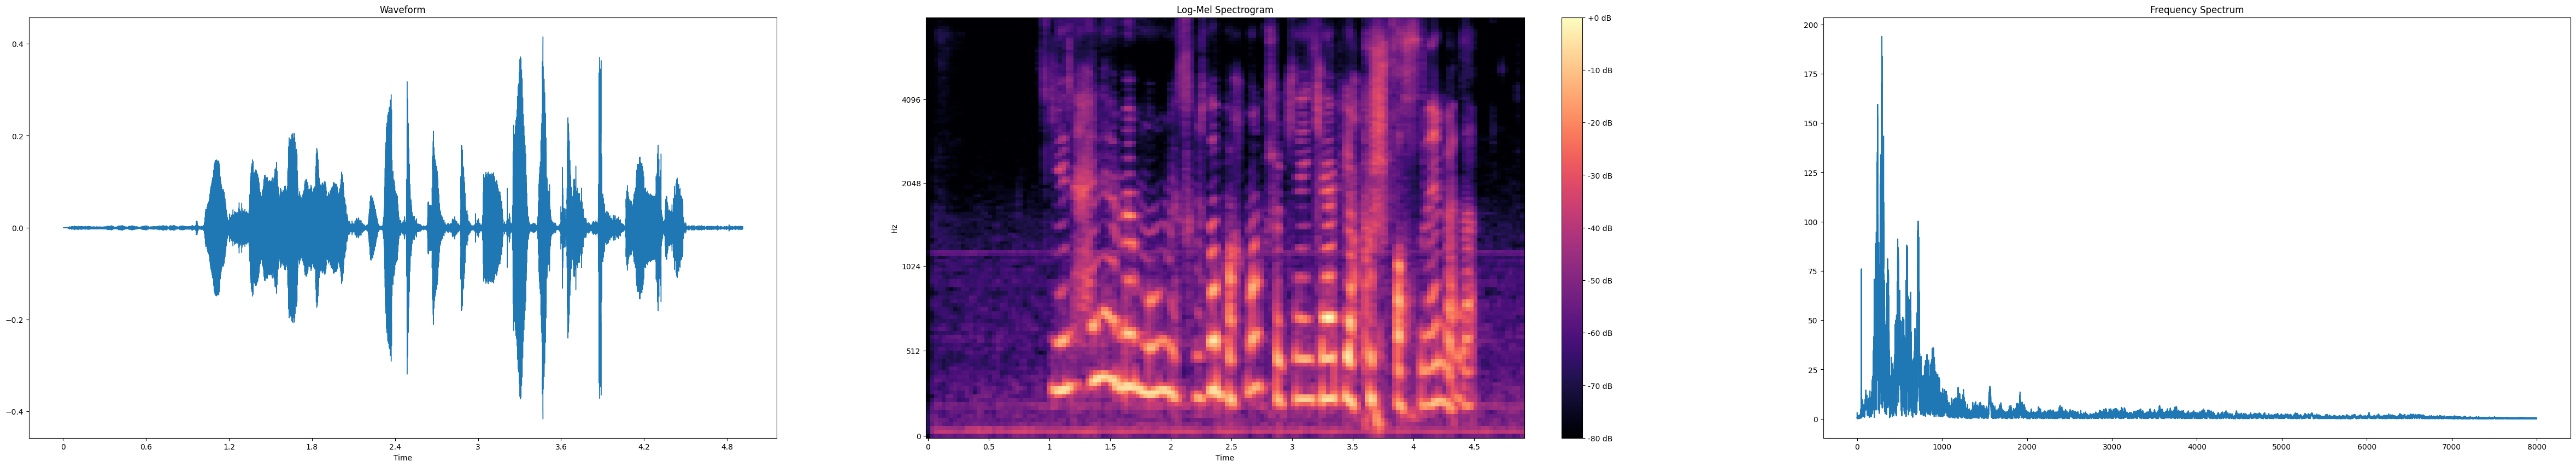

In [32]:
audio_show(wp_audio,name='whatsapp speech')
plt.figure(figsize=(60, 10))
plt.subplot(1,3,1)
wp_y,wp_sr=plot_wave(wp_audio)
plt.subplot(1,3,2)
spectogram(wp_y,wp_sr)
plt.subplot(1,3,3)
forier(wp_y)

BU spektrogramda parlaq sari rengelr sait sesleri gosterir , ufiqi xetler ise daha cox p, t kimi sammitleri (partlayan samitleri )
Model Bunu Necə Analiz Edir?
Dərin öyrənmə modeli (məsələn, bir CNN) bu spektroqrama eynilə bir şəkil kimi baxır. O, minlərlə belə "səs şəklinə" baxaraq müəyyən naxışları (patterns) öyrənir

### Folk song

segah


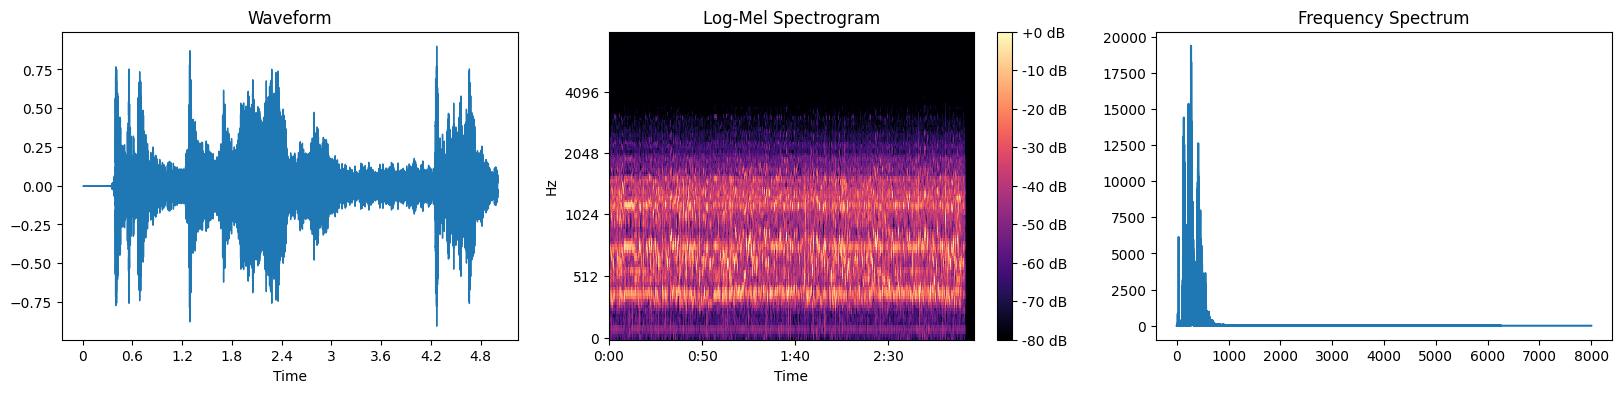

In [33]:
audio_show(downloaded_audio_filename,name='segah')
plt.figure(figsize=(20, 4))
plt.subplot(1,3,1)
folk_y,folk_sr=plot_wave(downloaded_audio_filename)
plt.subplot(1,3,2)
spectogram(folk_y,folk_sr)
plt.subplot(1,3,3)
forier(folk_y)


Ən aşağıdakı parlaq zolaq: Bu, səsin fundamental tezliyidir (F0), yəni səsin əsas tonu və ya "notu". Xanəndə avazını zilə qaldırdıqca bu xətt yuxarı, bəmə endirdikcə isə aşağı hərəkət edir.

Onun üstündəki zolaqlar: Bunlar səsin harmonikləridir. Onlar səsin tembrini, yəni "rəngini" və dolğunluğunu yaradır.

Dalğalanma: Bu zolaqların yavaş-yavaş titrəməsi və dalğalanması muğam ifasına xas olan vibrato (səsin titrəməsi) və melizmatik (bir hecanın fərqli notlarda uzadılması) ifanın vizual təsviridir. Adi danışıqda bu zolaqlar daha qısa və daha az dalğalı olur.

VAD Modeli Nə Görür? O, demək olar ki, heç bir yerdə tam səssizlik görmür. Hər yerdə enerji var. Buna görə də, haranın "danışıq" (vokal), haranın "küy" (musiqi) olduğuna qərar verməkdə çətinlik çəkir. Bu, bizim Demucs kimi "səs mühəndisi"nə ehtiyac duymamızın əsas səbəbidir.

### Geleck plan

Birinci şəkil (WP_audio): Bu, VAD (Voice Activity Detection) üçün ideal bir hədəfdir. Məqsəd, səsi səssizlikdən ayırmaqdır.

İkinci şəkil (Segah): Bu isə VAD üçün səhv hədəfdir. Burada məqsəd səsi səssizlikdən ayırmaq deyil, səsi səsdən ayırmaqdır (yəni, insan səsini musiqi alətinin səsindən ayırmaq).

## 1. Səs Aktivliyinin Təyini (Voice Activity Detection - VAD)

🔊 Voice Activity Detection (VAD) nədir?
VAD, bir səs faylında və ya canlı mikrofondan gələn siqnallarda səsin danışıq (speech) və ya səssizlik (silence/noise) hissələrini avtomatik olaraq ayırmaq üçündür.

Bu mərhələnin məqsədi audio fayldakı səssiz hissələri atıb, yalnız danışığın olduğu zaman aralıqlarını (timestamps) əldə etməkdir. Bunun üçün hazır kitabxanalardan istifadə etmək ən səmərəlisidir. Məcazi mınada izah etsək --  Bizə danışığı səssizlikdən ayıran ağıllı "ələk", yəni VAD modeli lazımdır. Biz bunu sıfırdan yaratmırıq, peşəkarların yaratdığı və internetdə paylaşdığı hazır bir modeli götürürük.

✅ Məqsədimiz:
Biz bir .wav səs faylını yükləyəcəyik və onun üzərində VAD tətbiq edəcəyik. Sonda danışıq hissələrinin zaman intervallarını alacağıq.

Istifadə edəcəyik silero-vad. Çox dəqiq və istifadəsi asandır.

🔍 Niyə Silero VAD?
Daha dəqiq: zəif səsləri də tanıya bilir.

Multilingual: bir çox dilə qarşı həssasdır.

onset və offset zamanlarını qaytarır.

torch modelidir, yəni GPU-da da işləyə bilər.

In [19]:
#Ona deyirik ki, internetə qoşulub, GitHub adlı böyük bir kod anbarından, bizim üçün hazır bir modeli tapıb gətirsin.
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=False,
                              onnx=False)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /root/.cache/torch/hub/master.zip


In [20]:
#Yüklədiyimiz paket təkcə modeldən ibarət deyil. hazır funksiyalar (utils - yəni, utilitlər) var.
(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

### (study)Exploring results

####Whatsapp audio

In [21]:
#Bu funksiya  faylımızı oxuyur, (PyTorch tenzoru) çevirir. Eyni zamanda onu 16000 Hz tezliyinə gətirir.
wav_wp_tensor = read_audio(wp_audio, sampling_rate=SAMPLING_RATE)
speech_timestamps = get_speech_timestamps(wav_wp_tensor, model, sampling_rate=SAMPLING_RATE)

In [22]:
wav_wp_tensor[16000:16200]
#her saniye 16000 olchme qeyde alinir ...
#Deyək ki, sizn .wav faylın 16 kHz-dir, yəni hər saniyədə 16,000 ölçmə var. Bu ölçmələr sizin səsinizin "şəkli"dir — biz buna dalğa (waveform) deyirik.
#Bizim tensordakı hər bir rəqəm, saniyənin çox kiçik bir anında dinamikin (və ya səs təzyiqinin) dəqiq mövqeyini – yəni Amplitudanı göstərir.

tensor([ 1.6184e-03,  1.6247e-03,  1.4668e-03,  1.5142e-03,  1.6673e-03,
         1.7837e-03,  2.0168e-03,  2.1217e-03,  2.4833e-03,  2.2317e-03,
         2.0944e-03,  1.8412e-03,  1.5282e-03,  1.4052e-03,  1.2969e-03,
         1.3363e-03,  1.7481e-03,  1.7218e-03,  1.7826e-03,  2.4435e-03,
         2.4191e-03,  2.2735e-03,  2.5206e-03,  2.5131e-03,  2.2179e-03,
         2.1617e-03,  2.1744e-03,  2.0169e-03,  1.8372e-03,  1.8978e-03,
         1.8804e-03,  1.7972e-03,  1.7891e-03,  1.9003e-03,  1.8270e-03,
         1.3715e-03,  1.3830e-03,  1.4113e-03,  8.3585e-04,  7.6106e-04,
         4.2220e-04, -2.4696e-04, -3.7433e-04, -7.1555e-04, -8.2071e-04,
        -8.1341e-04, -1.2190e-03, -1.1905e-03, -1.4640e-03, -2.0057e-03,
        -1.8182e-03, -1.7933e-03, -2.2640e-03, -2.2102e-03, -2.0691e-03,
        -2.1459e-03, -2.1869e-03, -1.9877e-03, -1.8504e-03, -1.9330e-03,
        -1.5283e-03, -1.2798e-03, -9.8389e-04, -8.3017e-04, -8.1810e-04,
        -7.2491e-04, -8.5934e-04, -9.6364e-04, -9.1

In [23]:
print(f'audionun uzunluqu : {len(wav_wp_tensor)//16000} saniye')

audionun uzunluqu : 4 saniye


In [24]:
speech_timestamps

[{'start': 15904, 'end': 73184}]

Danışıq 1: Başlangıc: 1 san,  Son: 5 san


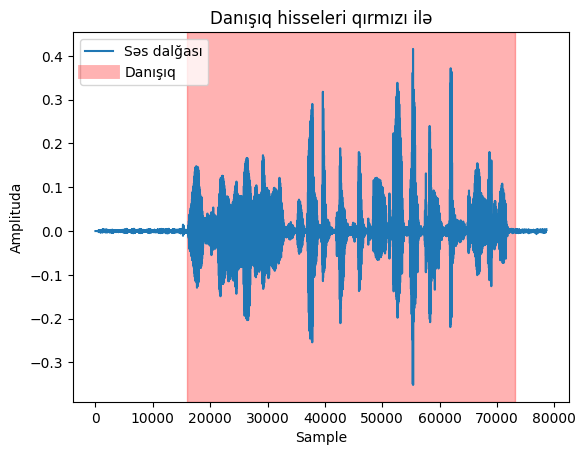

In [39]:
plot_speech_spectr(speech_timestamps, wav_wp_tensor, SAMPLING_RATE) #WP audio plot

In [41]:
os.makedirs("segments", exist_ok=True)

for i, segment in enumerate(speech_timestamps):
    start = segment['start']
    end = segment['end']
    # Hər bir danışıq hissəsini çıxar
    segment_tensor = wav_wp_tensor[start:end]
    # Yolunu təyin et və fayl kimi saxla
    path = f"segments/segment_{i}.wav"
    # Tenzoru .wav faylı kimi saxla
    torchaudio.save(path, segment_tensor.unsqueeze(0), SAMPLING_RATE)

    print(f"Saxlanıldı: {path}")

Saxlanıldı: segments/segment_0.wav


####Indi ise gelin segahdan yaana neticeye baxaq

In [ ]:
wav_folk_tensor = read_audio(downloaded_audio_filename , sampling_rate=SAMPLING_RATE)
folk_speech_timestamps = get_speech_timestamps(wav_folk_tensor , model, sampling_rate=SAMPLING_RATE)

In [ ]:
thresholds_to_test = [0.5, 0.4, 0.3, 0.2,0.1,0.09]

print("Fərqli Threshold Dəyərləri ilə VAD Analizinin Müqayisəsi")
for thresh in thresholds_to_test:
    print(f"\nThreshold = {thresh}")
    current_timestamps = get_speech_timestamps(wav_folk_tensor,
                                               model,
                                               threshold=thresh)

    if not current_timestamps:
        print("Bu threshold dəyəri ilə heç bir danışıq tapılmadı.")
        # Boş olsa belə qrafiki çəkək ki, fərqi görək
        plot_speech_spectr([], wav_folk_tensor, SAMPLING_RATE, thresh)
    else:
        plot_speech_spectr(current_timestamps, wav_folk_tensor, SAMPLING_RATE)

    print("-" * 50)

Bizim yoxladğımız yuxarıdakı nümunədə silero-vad tam uğun cavab verməyib (threashold ashaqi dushdukce duzelmeye calishib). Çünki bu səs əslində segahdı (dialoq və ya adi bir intonasiya ilə deyilən bir səs yazısı deyil).silero-vad alternativlərinden biri pyannote-dir

#####pyannote

In [ ]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/voice-activity-detection",
                                    use_auth_token=True)

In [ ]:
result = pipeline(downloaded_audio_filename)
speech_timestamps = result.get_timeline().support()

In [ ]:
speech_timestamps #

Gorunduyu kimi pyannote-da o qederde yaxsi netice vermedi demeli, bu bir daha gosterir ki biz sesizliyi sesden ayirmamaliyiq, sesi sesden ayirmaliyiq yeni: sizin segah kimi mürəkkəb bir audio üçün VAD-dan imtina edib, birbaşa "Music Source Separation" (məsələn, Demucs) alətinə keçid ede bilerik.

#####Separation vocal and background sound Demucs

In [ ]:
demucs_model = get_demucs_model(name='htdemucs')
demucs_model.cpu()
demucs_model.eval()

waveform, sample_rate = torchaudio.load('/content/online_audio.ogg')
resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=demucs_model.samplerate)
waveform = resampler(waveform)

# Model eyni anda bir neçə faylı emal edə bildiyi üçün (batch processing)
waveform = waveform.unsqueeze(0)

print("Audio ayrılır... Bu proses bir qədər vaxt apara bilər.")
with torch.no_grad():
    separated_sources = apply_model(demucs_model, waveform, device='cpu')[0]

# Nəticədən bizə lazım olanı - vokalı - götürürük.
# Standart 'htdemucs' modelində vokal 4-cü elementdir (indeks 3).
vocals_tensor = separated_sources[3]

# Sonrakı addımlarda asan istifadə üçün təmiz vokal tenzorumuzu
# müvəqqəti bir .wav faylına yazırıq.
clean_vocals_path = "vocals_only.wav"
# Diqqət: Demucs stereo çıxış verir, biz onu mono-ya çeviririk
vocals_mono = torch.mean(vocals_tensor, dim=0, keepdim=True)
sf.write(clean_vocals_path, vocals_mono.cpu().numpy().T, demucs_model.samplerate)

print(f"✅ Proses uğurla başa çatdı. Təmiz vokal '{clean_vocals_path}' faylına yazıldı.")

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('clean')
y_cleaned, sr_cleaned=plot_wave(clean_vocals_path)
plt.subplot(2,2,2)
spectogram(y_cleaned,sr_cleaned)
plt.subplot(2,2,3)
plt.title('noisy')
folk_y,folk_sr=plot_wave(downloaded_audio_filename)
plt.subplot(2,2,4)
spectogram(folk_y,folk_sr)
plt.tight_layout()

cox az temizlendi cox guman (cunki cox noisydi) :)) tebii ki her sehyi hell etmke olar. amma heleki bu qeder , vaxt qalsa baxacam

## SER->Speech Emotion Recognition

In [46]:
# Bu hücrə, düzgün, artıq təlim edilmiş multilingual SER modelini yükləyir
# və VAD ilə tapdığımız danışıq parçalarından birini analiz edir.
# Niyə? -> Bu model, 'xlsr-53' bünövrəsi üzərində artıq emosiya tanıma
# üçün təlim edilib. O, birbaşa istifadə üçün hazırdır.
model_name = "jonatasgrosman/wav2vec2-large-xlsr-53-english"

ser_feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
ser_model = Wav2Vec2ForSequenceClassification.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-english and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###On (Azerbaijani) sample example

In [42]:
audio_chunk_to_analyze = "segments/segment_0.wav"

In [43]:
speech_array, _ = librosa.load(audio_chunk_to_analyze, sr=SAMPLING_RATE)

In [47]:
inputs = ser_feature_extractor(speech_array,
                              sampling_rate=SAMPLING_RATE,
                              return_tensors="pt",
                              padding=True)

In [48]:
with torch.no_grad():
        logits = ser_model(**inputs).logits

In [50]:
id2label = {
    0: "angry",
    1: "calm",
    2: "disgust",
    3: "fearful",
    4: "happy",
    5: "neutral",
    6: "sad",
    7: "surprised"
}

In [51]:
predictions = torch.argmax(logits, dim=-1)
prediction_id = predictions.item()
emotion = id2label[prediction_id]

print(f"'{audio_chunk_to_analyze}' faylının emosional tonu: {emotion.upper()}")

# --- Nəticəni Yoxlamaq üçün Dinləmək ---
print("Analiz Edilən Səs Parçası")
display(Audio(audio_chunk_to_analyze))


--- ANALİZİN YEKUN NƏTİCƏSİ ---
✅ 'segments/segment_0.wav' faylının emosional tonu: CALM

--- Analiz Edilən Səs Parçası ---


Model azerbaycani taniyir , tebiiki Fine Tune olunsaydi Azerbaycan dilinde dataya daha deqiq neticelr elde ede blerdik.

### Fine_Tune

Təlim üçün bizə Azərbaycan dilində, emosiyaları ilə etiketlənmiş yüzlərlə səs yazısından ibarət bir məlumat bazası (dataset) lazımdır. Təəssüf ki, belə bir dataset hələ ki, ictimaiyyətə açıq deyil.